In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

In [4]:
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Prediction
1985-03,7.209340,-1.277433,-4.327074,0.744988,-0.531027,1.004126,-0.851989,0.255075,0.567930,0.358221,0.249011,-0.825895,-0.529244,-0.904615,0.108156,13.035309
1985-06,6.893940,-1.709273,-4.122886,0.839108,-0.084579,0.662230,-0.702346,0.412531,0.417298,0.335329,0.320465,-0.796355,-0.511677,-0.911772,0.053614,13.160484
1985-09,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,16.657703
1985-12,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,16.345213
1986-03,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,15.921562
1986-06,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,14.741072
1986-09,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,13.267827
1986-12,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,16.734827
1987-03,7.198027,-0.659948,-4.445436,0.929271,-0.476685,0.859010,-0.458682,0.259011,0.669047,0.543142,0.410577,-0.547864,-0.410874,-0.329028,0.352228,18.234604
1987-06,6.837969,-1.090749,-4.256983,1.012418,-0.040583,0.573919,-0.306082,0.369929,0.533837,0.619256,0.635799,-0.499934,-0.381354,-0.416362,0.341966,17.033018


In [5]:
X_scaled = np.array(data.drop(['Prediction'], axis=1))
y_scaled = np.array(data['Prediction'])

In [6]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [8]:
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1), cv=10, param_grid = 
                      {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_features': ['auto', 'sqrt', 'log2']
                      }
                  )

In [9]:
# Create and train the Support Vector Machine (Regressor) 
#svr = svr = SVR(kernel='rbf', C=14.0, gamma=0.03, epsilon=0.4)
#svr = SVR(kernel='rbf', C=200, gamma=0.98, epsilon=0.05)
rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 100]})

In [10]:
rf.best_params_

{'max_features': 'auto', 'n_estimators': 50}

In [11]:
HOLDOUT = 10
params = dict()
for i in range(HOLDOUT):
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=i)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    # Train model
    rf.fit(X_train, y_train)
    # Get best params
    param = str(rf.best_params_)
    if param in list(params.keys()):
        params[param]['count'] += 1
        params[param]['train_score'].append(rf.score(X_train, y_train))
        params[param]['test_score'].append(rf.score(X_test, y_test))
        params[param]['random_seeds'].append(i)
    else:
        params[param] = {'count':1, 'train_score':[rf.score(X_train, y_train)], 'test_score':[rf.score(X_test, y_test)], 'random_seeds':[i]}
for key in (params.keys()):
    print('Params={}\nCount:{}\nTrain_Score:{}\nTest_Score:{}\nRandom_Seeds:{}\n\n'.format(key,params[key]['count'], np.mean(params[key]['train_score']), np.mean(params[key]['test_score']), str(params[key]['random_seeds'])))

Params={'max_features': 'auto', 'n_estimators': 100}
Count:4
Train_Score:0.988776232957366
Test_Score:0.910548081777496
Random_Seeds:[0, 1, 5, 7]


Params={'max_features': 'auto', 'n_estimators': 40}
Count:2
Train_Score:0.9879263206290632
Test_Score:0.9181558468134766
Random_Seeds:[2, 3]


Params={'max_features': 'auto', 'n_estimators': 10}
Count:2
Train_Score:0.9814303879827796
Test_Score:0.9292838343355649
Random_Seeds:[4, 9]


Params={'max_features': 'auto', 'n_estimators': 30}
Count:1
Train_Score:0.9888820161271982
Test_Score:0.9335124804059872
Random_Seeds:[6]


Params={'max_features': 'auto', 'n_estimators': 50}
Count:1
Train_Score:0.9881067825927905
Test_Score:0.9349605870004591
Random_Seeds:[8]




In [12]:
#Results log
Params={'max_features': 'auto', 'n_estimators': 100, 'rs': [0, 1, 5, 7]}
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=Params['rs'][randint(0,len(Params['rs'])-1)])
y_train = y_train.ravel()
y_test = y_test.ravel()
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [13]:
rf.score(X_train, y_train)

0.990871701024398

In [14]:
rf.score(X_test, y_test)

0.9086129385694427

In [15]:
mean_squared_error(y_test, rf.predict(X_test), squared=False)

14.697335415808238

In [149]:
#abs_sc_predict.inverse_transform(svr.predict(X_pred_scaled).reshape(1,-1))
sc_predict.inverse_transform(svr.predict(X_scaled[-1:, :]))

array([71.34155587])

In [166]:
#abs_sc_predict.inverse_transform(y_scaled[-1:, :])
sc_predict.inverse_transform(y_scaled[-1:, :])

array([[115.6105423]])

In [246]:
X_pred_scaled[:,-1]

array([1.53023942, 1.68216111, 1.68716952, 1.69217793])

In [247]:
X_scaled[:,-1]

array([-1.65677714, -1.65176873, -1.64676032, -1.64175192, -1.48983023,
       -1.48482182, -1.47981341, -1.474805  , -1.32288331, -1.31787491,
       -1.3128665 , -1.30785809, -1.1559364 , -1.15092799, -1.14591959,
       -1.14091118, -0.98898949, -0.98398108, -0.97897267, -0.97396427,
       -0.82204258, -0.81703417, -0.81202576, -0.80701735, -0.65509566,
       -0.65008726, -0.64507885, -0.64007044, -0.48814875, -0.48314034,
       -0.47813193, -0.47312353, -0.32120184, -0.31619343, -0.31118502,
       -0.30617661, -0.15425492, -0.14924652, -0.14423811, -0.1392297 ,
        0.01269199,  0.0177004 ,  0.0227088 ,  0.02771721,  0.1796389 ,
        0.18464731,  0.18965572,  0.19466412,  0.34658581,  0.35159422,
        0.35660263,  0.36161104,  0.51353273,  0.51854113,  0.52354954,
        0.52855795,  0.68047964,  0.68548805,  0.69049645,  0.69550486,
        0.84742655,  0.85243496,  0.85744337,  0.86245177,  1.01437346,
        1.01938187,  1.02439028,  1.02939869,  1.18132038,  1.18

In [26]:
PRED = rf.predict(X_scaled)

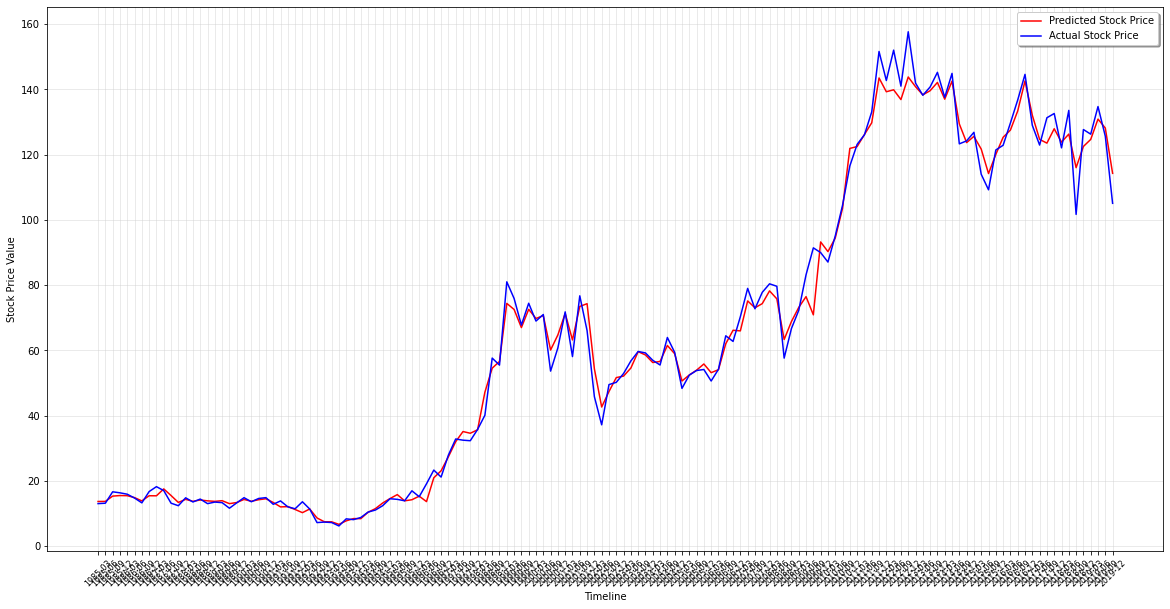

RMSE 3.994198651228779
RMSE test: 6.109126446518595


In [27]:
#params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2
# TSCO

# Plot parameters
START_DATE_FOR_PLOTTING = '1985-03'
ENDING_DATE_FOR_PLOTTING = '2020-03'
START_INDEX = data.index.get_loc(START_DATE_FOR_PLOTTING)
ENDING_INDEX = data.index.get_loc(ENDING_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(data.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
plt.plot(data.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

#plt.axvline(x = data.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
#plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED, squared=False))
print("RMSE test:",mean_squared_error(y_test, rf.predict(X_test), squared=False))

'NSC'

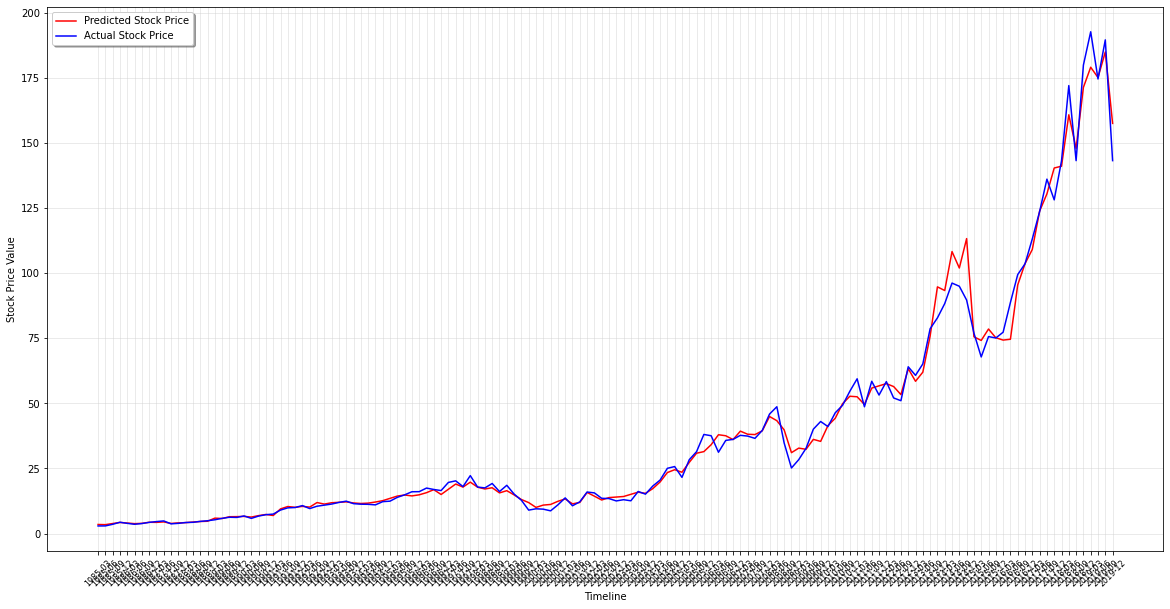

RMSE 5.547384374152441
R2-score test: 0.9822000582954084
R2-score_adj test: 0.9792334013446431
RMSE test: 4.089457929665302
MAE test: 2.612296363238631


'GL'

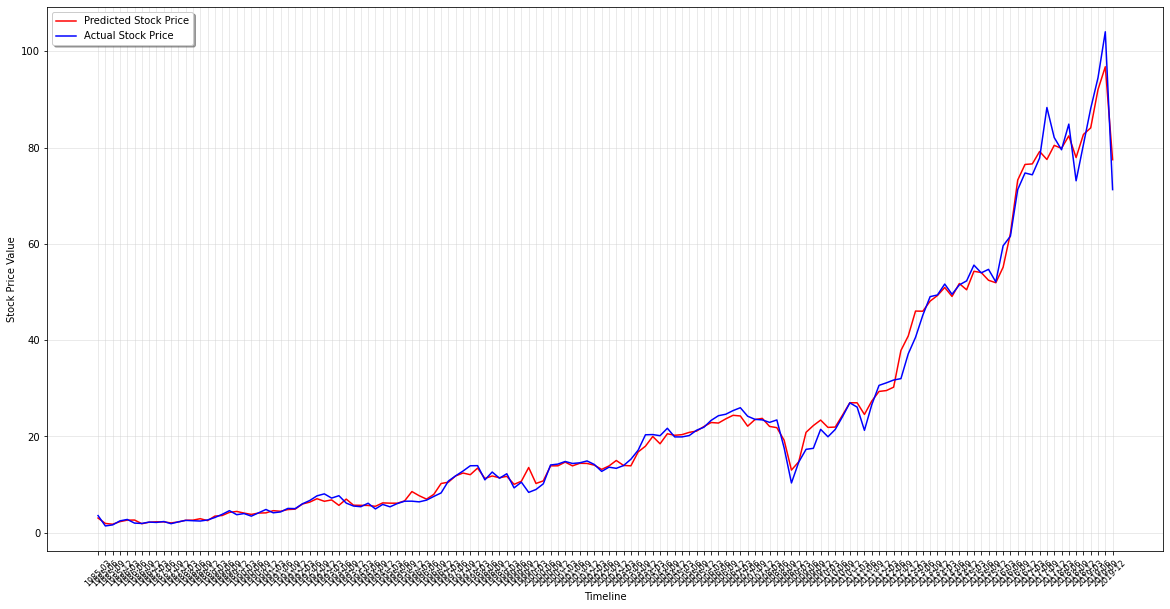

RMSE 1.9925100001679998
R2-score test: 0.9828797893246727
R2-score_adj test: 0.9800264208787848
RMSE test: 2.616025049733192
MAE test: 1.5195927564029037


'PEP'

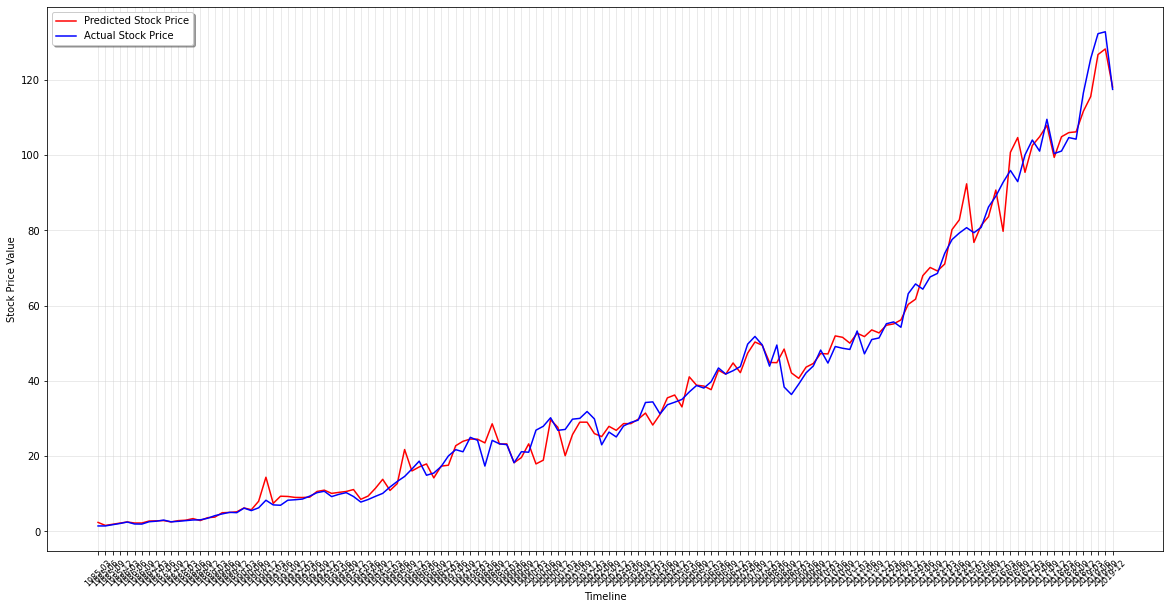

RMSE 3.7109870857086
R2-score test: 0.9745891946535211
R2-score_adj test: 0.970354060429108
RMSE test: 5.097827256357022
MAE test: 3.883378252489813


'BDX'

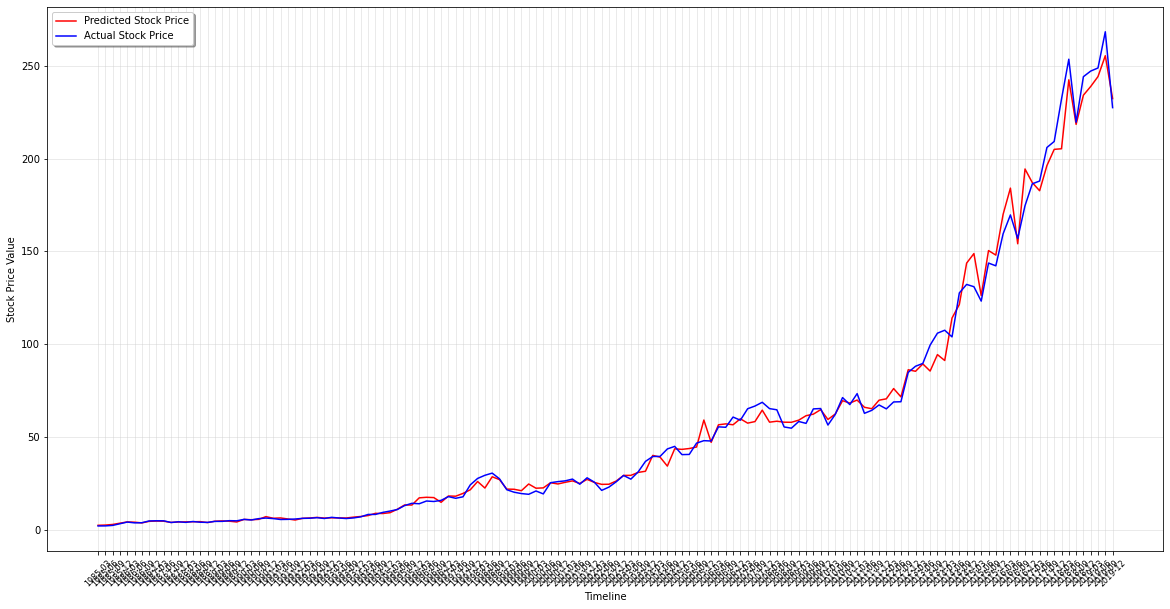

RMSE 5.65282470184683
R2-score test: 0.9847055511252675
R2-score_adj test: 0.9821564763128121
RMSE test: 6.338150512636235
MAE test: 4.417081124124852


'IBM'

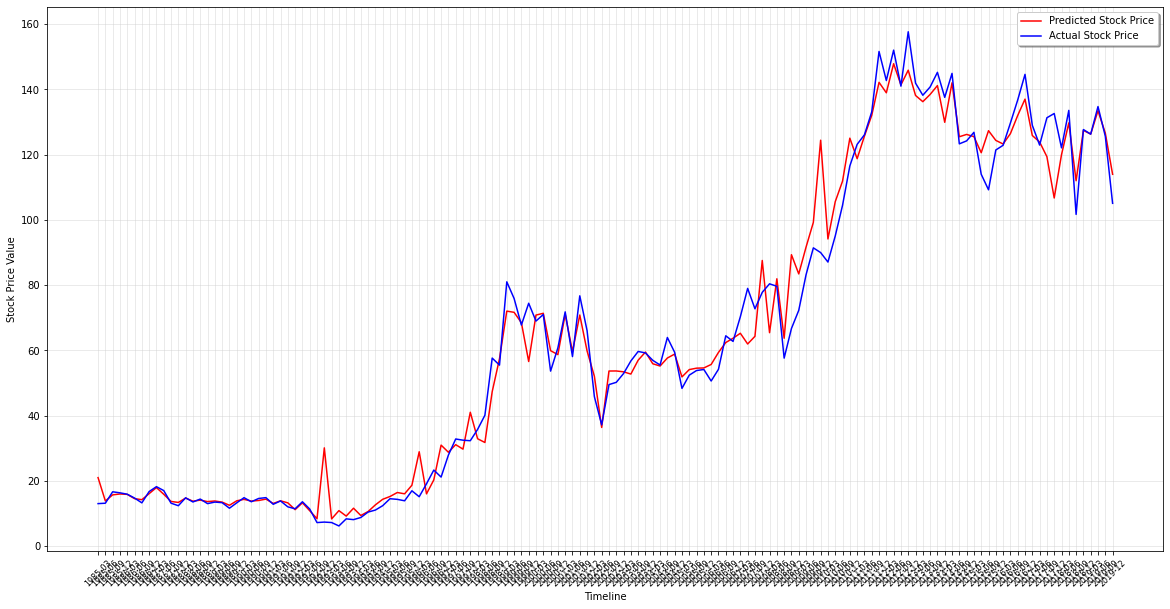

RMSE 6.935361191726434
R2-score test: 0.9254926557575851
R2-score_adj test: 0.913074765050516
RMSE test: 11.154251626194736
MAE test: 7.639593488265728


In [18]:
#Results log
Params={'max_features': 'auto', 'n_estimators': 100, 'rs': [0, 1, 5, 7]}
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    display(stock)
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    X_scaled = np.array(data.drop(['Prediction'], axis=1))
    y_scaled = np.array(data['Prediction'])
    
    rand_stt = None
    min_error = 1000
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=i)
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
        rf.fit(X_train, y_train)
        error = mean_squared_error(y_test, rf.predict(X_test), squared=False)
        if error < min_error:
            rand_stt = i
            min_error = error
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=rand_stt)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
    rf.fit(X_train, y_train)
    PRED = rf.predict(X_scaled)
    
    #Visualization
    #params = str(Params)
    # Chage on attributes and no change on PricePerShare
    # Reduced attributes v2
    # TSCO

    # Plot parameters
    START_DATE_FOR_PLOTTING = '1985-03'
    ENDING_DATE_FOR_PLOTTING = '2020-03'
    START_INDEX = data.index.get_loc(START_DATE_FOR_PLOTTING)
    ENDING_INDEX = data.index.get_loc(ENDING_DATE_FOR_PLOTTING)
    fig1,ax1 = plt.subplots(figsize=(20,10))


    plt.plot(data.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
    plt.plot(data.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

    #plt.axvline(x = data.index[-5], color='green', linewidth=2, linestyle='--')

    plt.grid(which='major', color='#cccccc', alpha=0.5)

    plt.legend(shadow=True)
    #plt.title(params, family='DejaVu Sans', fontsize=12)
    plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
    plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.show()
    
    print("RMSE",mean_squared_error(y_scaled, PRED, squared=False))
    print("R2-score test:",r2_score(y_test, rf.predict(X_test)))
    print("R2-score_adj test:",1-(1-r2_score(y_test, rf.predict(X_test)))*(len(y_test)-1)/(len(y_test)-4-1))
    print("RMSE test:",mean_squared_error(y_test, rf.predict(X_test), squared=False))
    print("MAE test:",mean_absolute_error(y_test, rf.predict(X_test)))